
# Лабораторная работа №4
## Разведочный анализ данных (EDA) с использованием matplotlib

**Тема датасета:** продажи видеоигр (Video Game Sales)  
**Формат:** CSV  
**Категориальные признаки:** Platform, Genre, Publisher  
**Числовые признаки:** NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, Year (после очистки)  

**Источник данных:** открытый датасет "Video Game Sales" (vgchartz).  
Для удобства загрузки в ноутбуке используется CSV по прямой ссылке (raw).

Цель работы - выполнить EDA: структура данных, пропуски (в том числе скрытые), статистика, выбросы и визуализации только с помощью matplotlib.


## 1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Загрузка данных
Если файла `vgsales.csv` нет рядом с ноутбуком, пробуем загрузить по ссылке.

In [2]:
import os

LOCAL_PATH = "vgsales.csv"
URL = "https://gist.githubusercontent.com/designernatan/27da044c6dc823f7ac7fe3a01f4513ed/raw/d15b5c7d7a5efb38750b16ec935fc126ec9a6e79/vgsales.csv"

# Учитываем "скрытые" пропуски: N/A, ?, пустая строка
NA_VALUES = ["N/A", "NA", "?", "", "null", "None"]

if os.path.exists(LOCAL_PATH):
    df = pd.read_csv(LOCAL_PATH, na_values=NA_VALUES)
    print("Данные загружены из файла:", LOCAL_PATH)
else:
    df = pd.read_csv(URL, na_values=NA_VALUES)
    print("Данные загружены по ссылке:", URL)

print("Размер таблицы (строки, столбцы):", df.shape)
display(df.head(3))

Данные загружены из файла: vgsales.csv
Размер таблицы (строки, столбцы): (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


## 3. Общая характеристика данных

In [3]:
print("Названия столбцов:", list(df.columns))
print("\nТипы данных:")
display(df.dtypes)

print("\nКоличество уникальных значений в категориальных признаках (пример):")
for col in ["Platform", "Genre", "Publisher"]:
    if col in df.columns:
        print(f"- {col}: {df[col].nunique()} уникальных")

Названия столбцов: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

Типы данных:


Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


Количество уникальных значений в категориальных признаках (пример):
- Platform: 31 уникальных
- Genre: 12 уникальных
- Publisher: 578 уникальных


## 4. Анализ пропусков (включая скрытые значения)
Считаем пропуски по столбцам и строим столбчатую диаграмму.

Пропуски по столбцам:


Year            271
Publisher        58
Rank              0
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

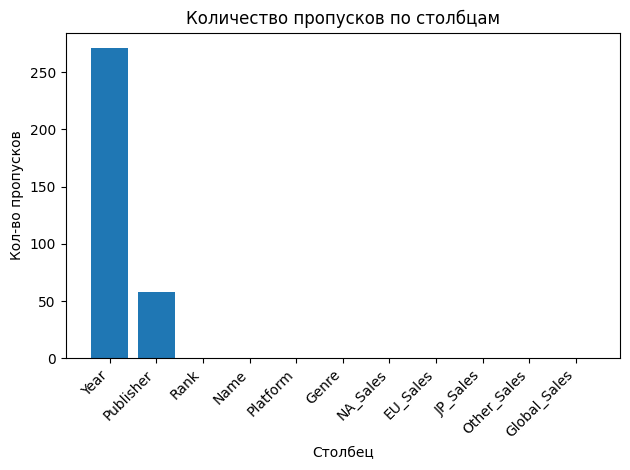

In [4]:
missing = df.isna().sum().sort_values(ascending=False)
print("Пропуски по столбцам:")
display(missing)

# Столбчатая диаграмма пропусков (matplotlib)
plt.figure()
plt.bar(missing.index.astype(str), missing.values)
plt.title("Количество пропусков по столбцам")
plt.xlabel("Столбец")
plt.ylabel("Кол-во пропусков")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 5. Мини-очистка данных
Пример: столбец Year может содержать текст (например N/A). Приведем Year к числу.

In [5]:
df2 = df.copy()

# Year -> число (если не число, станет NaN)
if "Year" in df2.columns:
    df2["Year"] = pd.to_numeric(df2["Year"], errors="coerce")

print("После приведения Year к числу:")
print("Пропуски Year:", df2["Year"].isna().sum() if "Year" in df2.columns else "нет столбца Year")
display(df2.head(3))

После приведения Year к числу:
Пропуски Year: 271


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


## 6. Статистические оценки
Для числовых признаков считаем mean, median, std, min, max. Для категориальных - частоты.

In [6]:
# Числовые столбцы (берем только те, что реально числовые)
num_cols = df2.select_dtypes(include=["number"]).columns.tolist()
print("Числовые столбцы:", num_cols)

stats = df2[num_cols].describe().T
stats["median"] = df2[num_cols].median()
stats = stats[["count", "mean", "median", "std", "min", "max"]]
print("\nСтатистика по числовым признакам:")
display(stats)

# Категориальные: топ-10 значений
cat_cols = [c for c in ["Platform", "Genre", "Publisher"] if c in df2.columns]
for c in cat_cols:
    print(f"\nТоп-10 категорий для {c}:")
    display(df2[c].value_counts().head(10))

Числовые столбцы: ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

Статистика по числовым признакам:


,count,mean,median,std,min,max
Rank,16598.0,8300.605254,8300.50,4791.853933,1.00,16600.00
Year,16327.0,2006.406443,2007.00,5.828981,1980.00,2020.00
NA_Sales,16598.0,0.264667,0.08,0.816683,0.00,41.49
EU_Sales,16598.0,0.146652,0.02,0.505351,0.00,29.02
JP_Sales,16598.0,0.077782,0.00,0.309291,0.00,10.22
Other_Sales,16598.0,0.048063,0.01,0.188588,0.00,10.57
Global_Sales,16598.0,0.537441,0.17,1.555028,0.01,82.74



Топ-10 категорий для Platform:


Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: count, dtype: int64


Топ-10 категорий для Genre:


Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Name: count, dtype: int64


Топ-10 категорий для Publisher:


Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: count, dtype: int64

## 7. Визуализация 1 - гистограмма
Гистограмма распределения Global_Sales.

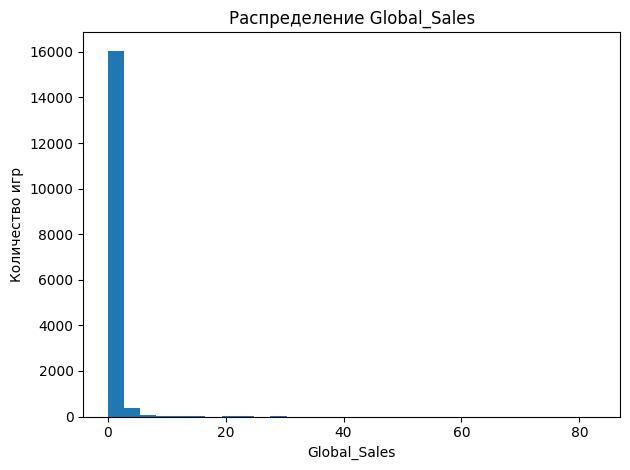

In [7]:
plt.figure()
plt.hist(df2["Global_Sales"].dropna(), bins=30)
plt.title("Распределение Global_Sales")
plt.xlabel("Global_Sales")
plt.ylabel("Количество игр")
plt.tight_layout()
plt.show()

## 8. Визуализация 2 - столбчатая диаграмма
Распределение жанров (Genre) - топ-10.

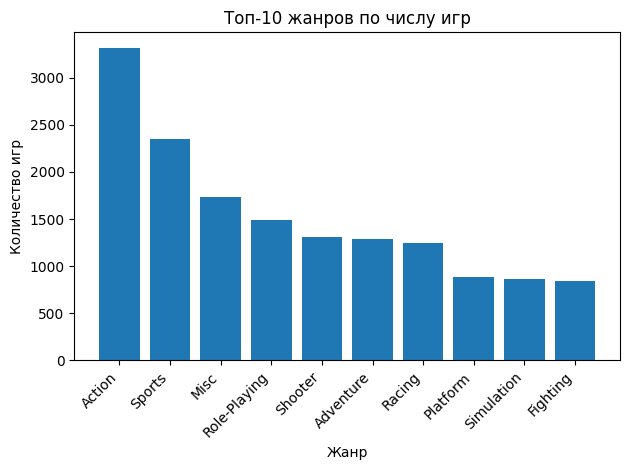

In [8]:
genre_counts = df2["Genre"].value_counts().head(10)
plt.figure()
plt.bar(genre_counts.index.astype(str), genre_counts.values)
plt.title("Топ-10 жанров по числу игр")
plt.xlabel("Жанр")
plt.ylabel("Количество игр")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 9. Визуализация 3 - пузырьковая диаграмма (scatter + размер точки)
Пример: NA_Sales и EU_Sales, размер точки - JP_Sales.

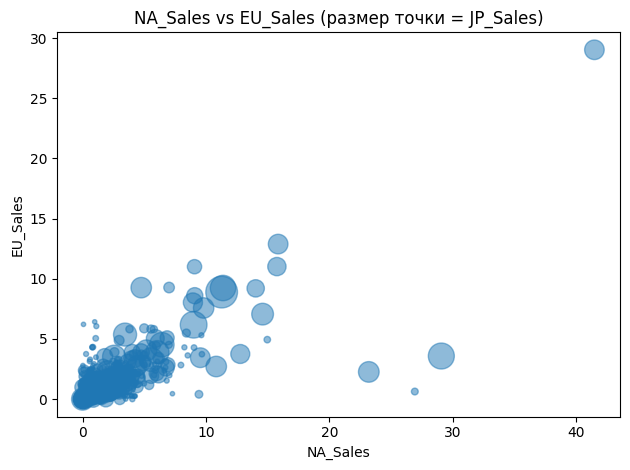

In [9]:
tmp = df2[["NA_Sales", "EU_Sales", "JP_Sales"]].dropna().copy()

# Чтобы точки не были огромными, масштабируем размер
sizes = (tmp["JP_Sales"] * 50) + 10

plt.figure()
plt.scatter(tmp["NA_Sales"], tmp["EU_Sales"], s=sizes, alpha=0.5)
plt.title("NA_Sales vs EU_Sales (размер точки = JP_Sales)")
plt.xlabel("NA_Sales")
plt.ylabel("EU_Sales")
plt.tight_layout()
plt.show()

## 10. Визуализация 4 - box plot (выбросы)
Box plot для Global_Sales.

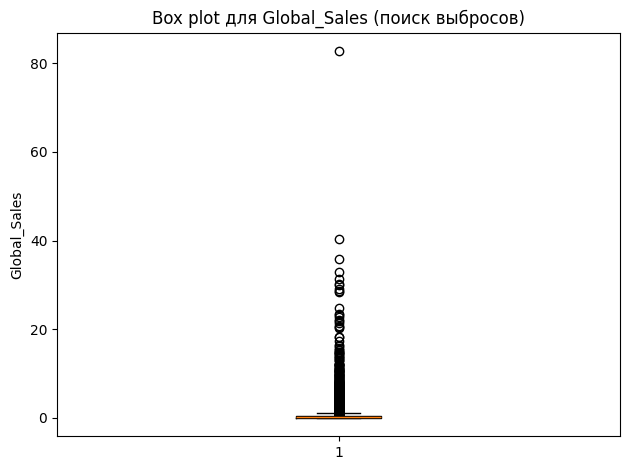

In [10]:
plt.figure()
plt.boxplot(df2["Global_Sales"].dropna(), vert=True)
plt.title("Box plot для Global_Sales (поиск выбросов)")
plt.ylabel("Global_Sales")
plt.tight_layout()
plt.show()

## 11. Дополнительная визуализация (по желанию)
Круговая диаграмма долей топ-5 платформ по количеству игр.

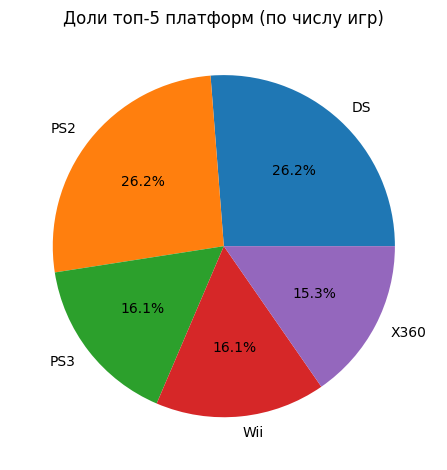

In [11]:
platform_counts = df2["Platform"].value_counts().head(5)
plt.figure()
plt.pie(platform_counts.values, labels=platform_counts.index.astype(str), autopct="%1.1f%%")
plt.title("Доли топ-5 платформ (по числу игр)")
plt.tight_layout()
plt.show()

## 12. Интерпретация и выводы
Напишите короткие выводы по графикам и статистикам.

- В данных есть пропуски (например, в Year), их важно учитывать в анализе.
- Распределение Global_Sales сильно скошено: много игр с малыми продажами и мало игр с очень большими продажами (видно по гистограмме и box plot).
- По жанрам распределение неравномерное: есть жанры-лидеры по количеству игр (bar plot).
- На scatter видно, что продажи в NA и EU часто растут вместе, но есть точки-аномалии (очень большие продажи в одном регионе).
- Можно сформулировать гипотезу: жанр и платформа влияют на Global_Sales, а региональные продажи связаны между собой, но по-разному для отдельных игр.
